
# EDA · Saber Pro 2020 — Universidad Mariana · Ingeniería de Sistemas (SNIES 2445)

Este cuaderno realiza un **Análisis Exploratorio de Datos (EDA)** profesional sobre los microdatos de **Saber Pro 2020**, con enfoque exclusivo en los estudiantes de **Universidad Mariana** matriculados en **Ingeniería de Sistemas** (código **SNIES 2445**).

**Objetivo dentro del TFM:** generar la **línea de salida** (desempeño al egreso) que luego se cruzará con la **línea de entrada** (Saber 11) para estimar **Valor Agregado (VA)** y **Contribución Relativa (CR)** del programa.


In [13]:

import os
import unicodedata
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tkinter import Tk, filedialog

plt.rcParams.update({
    "figure.figsize": (9, 5),
    "axes.grid": True
})

print("Librerías cargadas correctamente")

Librerías cargadas correctamente



## 1) Selección del archivo de datos

En lugar de fijar un nombre, se abrirá un cuadro de diálogo para seleccionar el archivo TXT de Saber Pro 2020.  
Así evitamos errores de "archivo no encontrado".


In [14]:

# Ruta fija del archivo Saber Pro 2020
file_path = "Examen_Saber_Pro_Genericas_2020.txt"

if not os.path.exists(file_path):
    raise FileNotFoundError(f"No se encontró el archivo en la ruta: {file_path}")

print("Archivo seleccionado:", file_path)

# Columnas de interés
COLS = [
    "estu_inst_departamento","inst_nombre_institucion","inst_cod_institucion","inst_origen","inst_caracter_academico",
    "estu_prgm_academico","estu_snies_prgmacademico","estu_nivel_prgm_academico",
    "estu_depto_presentacion","estu_mcpio_presentacion","estu_zona_presentacion",
    "estu_genero","fami_estratovivienda",
    "estu_horassemanatrabaja","estu_pagomatriculabeca","estu_pagomatriculacredito",
    "estu_pagomatriculapadres","estu_pagomatriculapropio",
    "mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
    "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global",
]

# Lectura del archivo
df = pd.read_csv(file_path, sep=";", encoding="latin1", low_memory=False)
keep = [c for c in COLS if c in df.columns]
df = df[keep].copy()

print("Dimensiones iniciales:", df.shape)
df.head(3)


Archivo seleccionado: Examen_Saber_Pro_Genericas_2020.txt
Dimensiones iniciales: (253138, 25)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
0,BOGOTÃ,POLITECNICO GRANCOLOMBIANO-BOGOTÃ D.C.,2725,NO OFICIAL - FUNDACIÃN,INSTITUCIÃN UNIVERSITARIA,NEGOCIOS INTERNACIONALES,101492.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,NaN,NaN,NaN,149,124,159.0,203.0,174,162.0,69.0
1,BOGOTÃ,UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA UNA...,2102,OFICIAL NACIONAL,UNIVERSIDAD,INGENIERIA ELECTRONICA,51728.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,NaN,NaN,NaN,161,162,111.0,198.0,175,161.0,69.0
2,BOGOTÃ,UNIVERSIDAD NACIONAL DE COLOMBIA-BOGOTÃ D.C.,1101,OFICIAL NACIONAL,UNIVERSIDAD,INGENIERIA CIVIL,25.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,NaN,NaN,NaN,202,195,210.0,198.0,204,202.0,98.0



## 2) Limpieza y normalización

- Conversión de puntajes a numéricos.  
- Normalización de textos (mayúsculas, sin tildes).  
- Eliminación de duplicados.


In [16]:

# 2.1 Conversión de puntajes
score_cols = ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
              "mod_ingles_punt","mod_competen_ciudada_punt","punt_global","percentil_global"]
for c in score_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# 2.2 Normalización de texto
def norm_text(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.replace("\xa0"," ", regex=False).str.strip()
    s = s.apply(lambda x: "".join(ch for ch in unicodedata.normalize("NFKD", x) if not unicodedata.combining(ch)))
    return s.str.upper()

for c in ["inst_nombre_institucion","estu_prgm_academico","inst_origen",
          "inst_caracter_academico","estu_genero","fami_estratovivienda","estu_inst_departamento",]:
    if c in df.columns:
        df[c] = norm_text(df[c])

# 2.3 Duplicados
before = len(df)
df = df.drop_duplicates()
print("Duplicados eliminados:", before - len(df))
df.info()

Duplicados eliminados: 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253138 entries, 0 to 253137
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   estu_inst_departamento     253138 non-null  object 
 1   inst_nombre_institucion    253138 non-null  object 
 2   inst_cod_institucion       253138 non-null  int64  
 3   inst_origen                253138 non-null  object 
 4   inst_caracter_academico    253138 non-null  object 
 5   estu_prgm_academico        253138 non-null  object 
 6   estu_snies_prgmacademico   253136 non-null  float64
 7   estu_nivel_prgm_academico  253137 non-null  object 
 8   estu_depto_presentacion    253049 non-null  object 
 9   estu_mcpio_presentacion    253049 non-null  object 
 10  estu_zona_presentacion     253137 non-null  object 
 11  estu_genero                253138 non-null  object 
 12  fami_estratovivienda       253138 non-null  object 
 13  estu


## 3) Filtro del universo de análisis

Se seleccionan únicamente estudiantes de **Universidad Mariana** y del programa **Ingeniería de Sistemas (SNIES 2445)**.


In [17]:

# Filtro por SNIES si está disponible
mask_snies = False
if "estu_snies_prgmacademico" in df.columns:
    mask_snies = df["estu_snies_prgmacademico"].astype(str).str.strip() == "2445"

# Filtro por nombre (respaldo)
inst_ok = df.get("inst_nombre_institucion", pd.Series(dtype=str)).str.contains("UNIVERSIDAD MARIANA", na=False)
prog_ok = df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("INGENIER", na=False) &           df.get("estu_prgm_academico", pd.Series(dtype=str)).str.contains("SISTEM", na=False)

if isinstance(mask_snies, pd.Series) and mask_snies.any():
    df_mariana = df[mask_snies].copy()
else:
    df_mariana = df[inst_ok & prog_ok].copy()

print("Filas tras filtro (Mariana · Ing. Sistemas):", df_mariana.shape)
df_mariana.head(3)

Filas tras filtro (Mariana · Ing. Sistemas): (15, 25)


,estu_inst_departamento,inst_nombre_institucion,inst_cod_institucion,inst_origen,inst_caracter_academico,estu_prgm_academico,estu_snies_prgmacademico,estu_nivel_prgm_academico,estu_depto_presentacion,estu_mcpio_presentacion,...,estu_pagomatriculacredito,estu_pagomatriculapadres,estu_pagomatriculapropio,mod_lectura_critica_punt,mod_razona_cuantitat_punt,mod_comuni_escrita_punt,mod_ingles_punt,mod_competen_ciudada_punt,punt_global,percentil_global
96525,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,No,No,Si,136,158,125.0,158.0,183,152.0,55.0
96526,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,Si,No,No,134,183,134.0,187.0,149,157.0,63.0
96527,NARIAO,UNIVERSIDAD MARIANA-PASTO,1720,NO OFICIAL - FUNDACIAN,UNIVERSIDAD,INGENIERIA DE SISTEMAS,2445.0,UNIVERSITARIO,BOGOTÃ,BOGOTÃ D.C.,...,No,No,No,120,138,110.0,139.0,116,125.0,18.0



## 4) Chequeos de calidad de puntajes


In [18]:

# Nulos
nulls = df_mariana[score_cols].isna().mean().sort_values(ascending=False).to_frame("pct_null")
display((nulls*100).round(2))

# Rango de puntajes
rng = pd.DataFrame({"min": df_mariana[score_cols].min(), "max": df_mariana[score_cols].max()})
display(rng)

,pct_null
mod_lectura_critica_punt,0.0
mod_razona_cuantitat_punt,0.0
mod_comuni_escrita_punt,0.0
mod_ingles_punt,0.0
mod_competen_ciudada_punt,0.0
punt_global,0.0
percentil_global,0.0


,min,max
mod_lectura_critica_punt,120.0,203.0
mod_razona_cuantitat_punt,109.0,192.0
mod_comuni_escrita_punt,110.0,190.0
mod_ingles_punt,139.0,212.0
mod_competen_ciudada_punt,92.0,187.0
punt_global,125.0,191.0
percentil_global,18.0,95.0



## 5) Estadísticos descriptivos


In [19]:

desc = df_mariana[score_cols].describe().T
display(desc)

,count,mean,std,min,25%,50%,75%,max
mod_lectura_critica_punt,15.0,156.600000,21.185575,120.0,143.0,158.0,165.0,203.0
mod_razona_cuantitat_punt,15.0,159.666667,22.176779,109.0,150.0,164.0,175.0,192.0
mod_comuni_escrita_punt,15.0,142.000000,20.805219,110.0,132.0,134.0,150.0,190.0
mod_ingles_punt,15.0,170.533333,21.437173,139.0,158.0,168.0,185.5,212.0
mod_competen_ciudada_punt,15.0,152.866667,28.440079,92.0,140.5,155.0,175.5,187.0
punt_global,15.0,156.266667,16.968318,125.0,149.0,157.0,167.0,191.0
percentil_global,15.0,60.066667,21.601808,18.0,50.5,63.0,76.0,95.0



## 6) Perfil sociodemográfico y formas de financiación


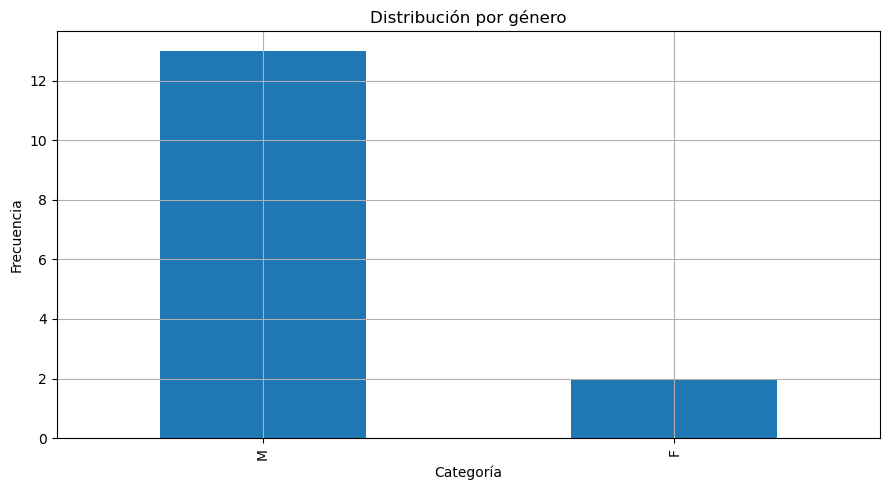

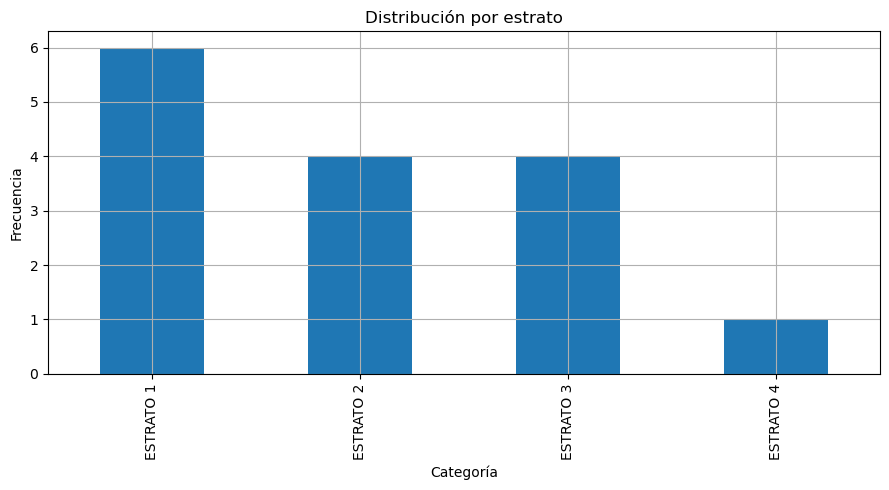

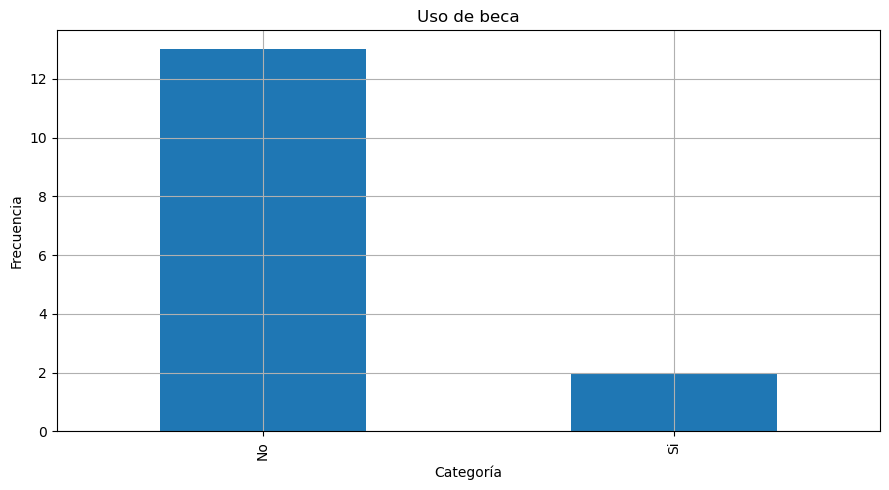

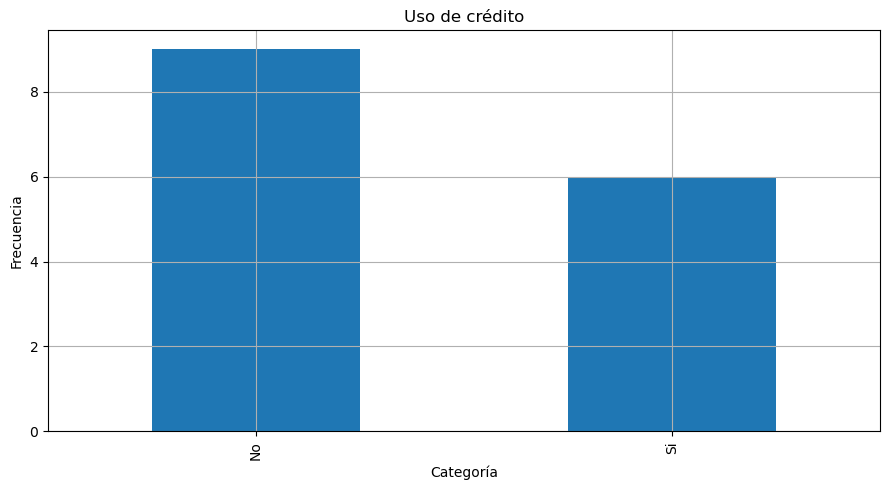

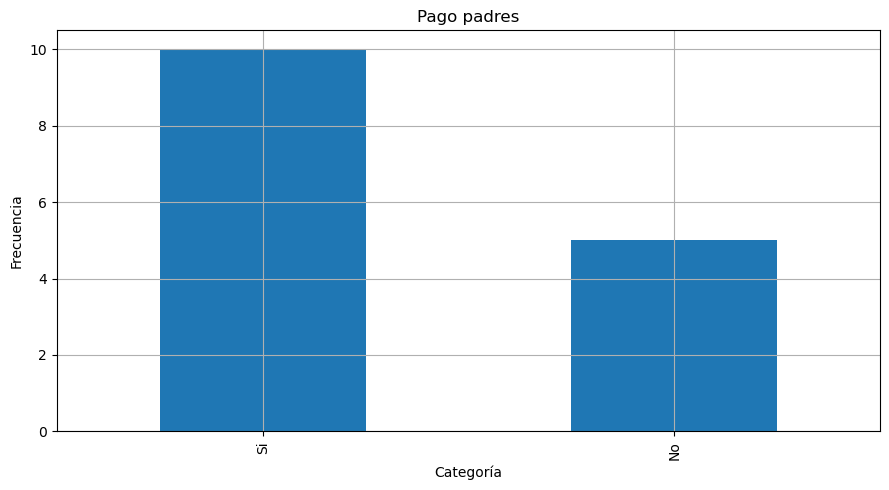

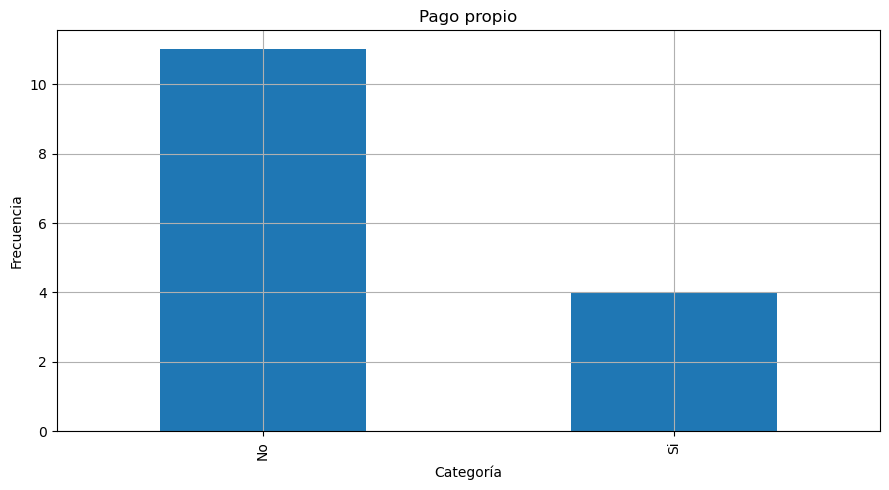

In [20]:

def plot_bar_counts(series, title):
    vc = series.value_counts(dropna=False)
    plt.figure()
    vc.plot(kind="bar")
    plt.title(title)
    plt.xlabel("Categoría")
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

if "estu_genero" in df_mariana.columns:
    plot_bar_counts(df_mariana["estu_genero"], "Distribución por género")

if "fami_estratovivienda" in df_mariana.columns:
    plot_bar_counts(df_mariana["fami_estratovivienda"], "Distribución por estrato")

for paycol, title in [("estu_pagomatriculabeca","Uso de beca"),
                      ("estu_pagomatriculacredito","Uso de crédito"),
                      ("estu_pagomatriculapadres","Pago padres"),
                      ("estu_pagomatriculapropio","Pago propio")]:
    if paycol in df_mariana.columns:
        plot_bar_counts(df_mariana[paycol], f"{title}")


## 7) Distribución de puntajes


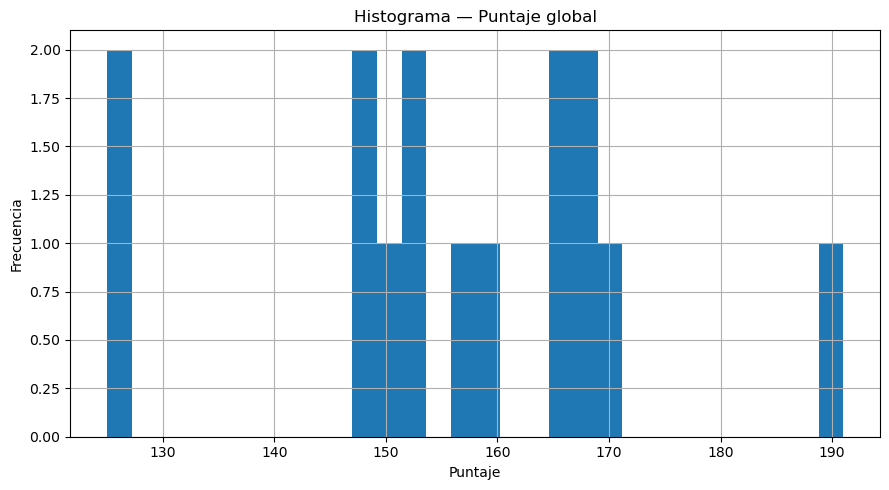

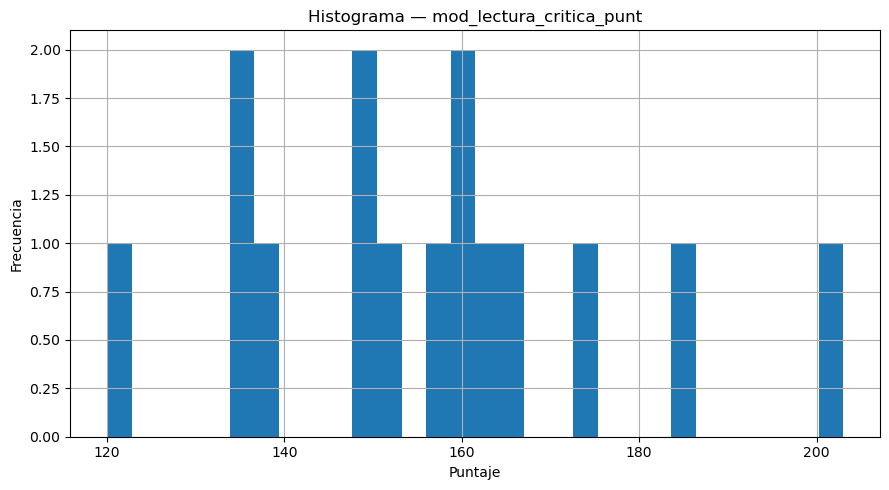

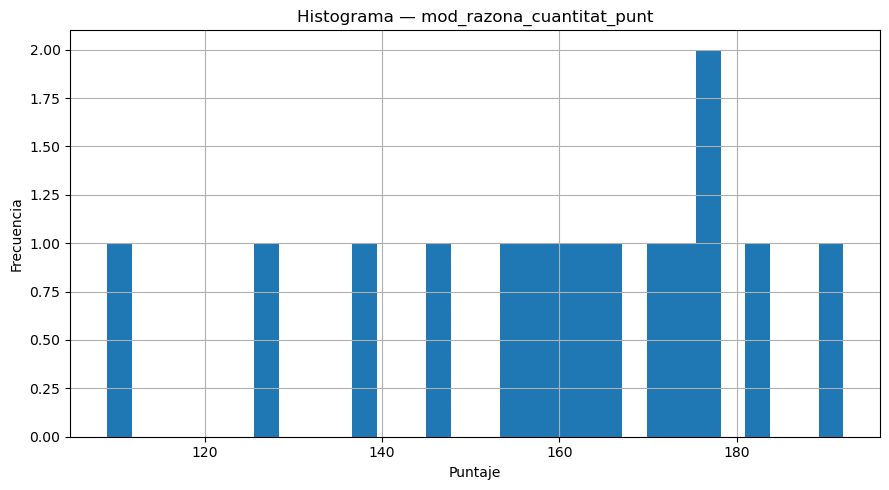

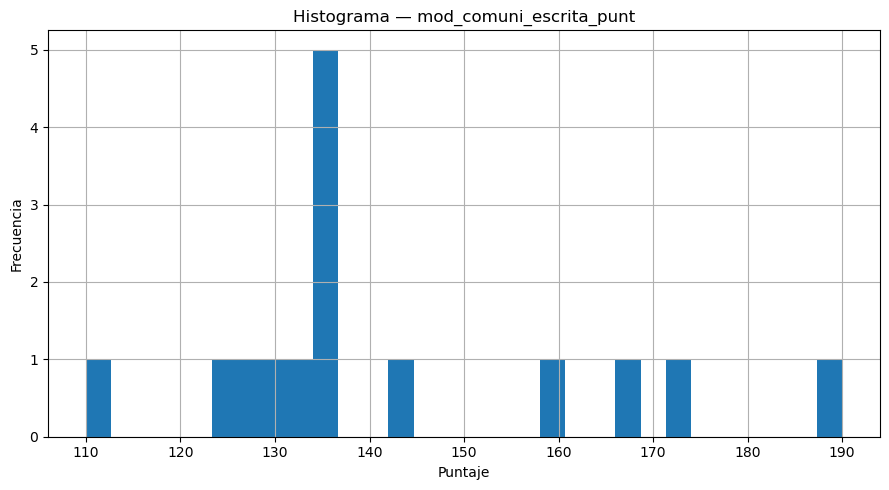

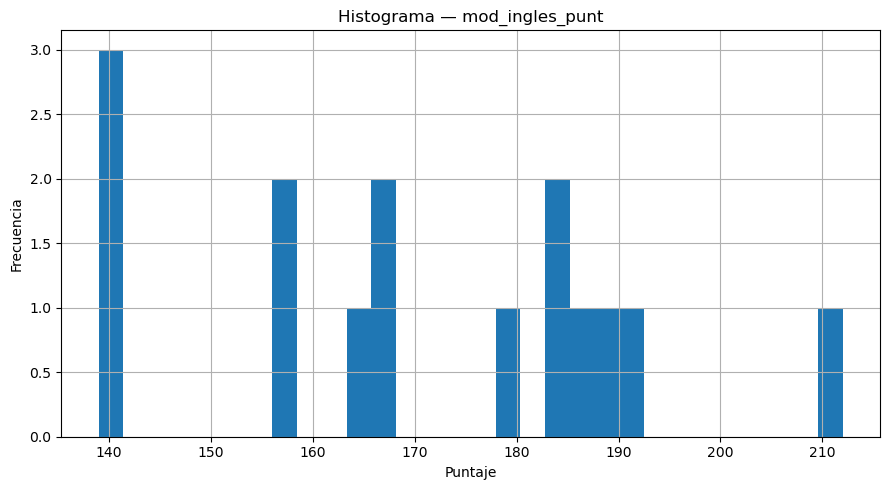

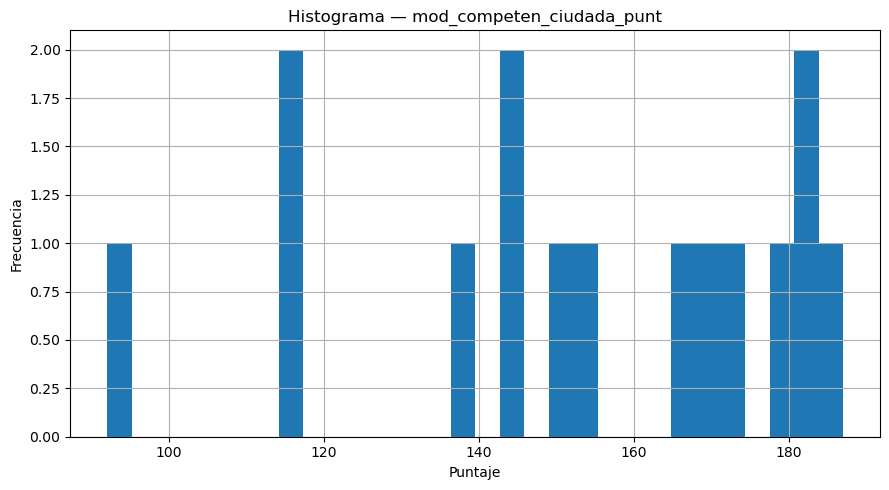

In [21]:

def hist_score(df_, col, title):
    if col in df_.columns and df_[col].notna().any():
        plt.figure()
        df_[col].dropna().plot(kind="hist", bins=30)
        plt.title(title)
        plt.xlabel("Puntaje")
        plt.ylabel("Frecuencia")
        plt.tight_layout()
        plt.show()

hist_score(df_mariana, "punt_global", "Histograma — Puntaje global")
for c in ["mod_lectura_critica_punt","mod_razona_cuantitat_punt","mod_comuni_escrita_punt",
          "mod_ingles_punt","mod_competen_ciudada_punt"]:
    hist_score(df_mariana, c, f"Histograma — {c}")


## 8) Exportación de datos limpios


In [11]:
from pathlib import Path

# Carpeta de salida
out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# Archivo destino
out_file = out_dir / "spro_mariana_sistemas_2020.csv"

# Guardar df_mariana directamente
df_mariana.to_csv(str(out_file), index=False, encoding="utf-8-sig")
print("✅ Guardado:", out_file)


✅ Guardado: C:\Temp\spro_2020_tfm_outputs\spro_mariana_sistemas_2020.csv


In [25]:
import re, unicodedata
import pandas as pd
from pathlib import Path

# --- helpers de limpieza robusta ---
def fix_mojibake(s):
    """Intenta corregir texto corrupto (utf8/latin1)."""
    if pd.isna(s): 
        return s
    s = str(s)
    # intento 1: típico latin1->utf8
    try:
        return s.encode('latin1').decode('utf-8')
    except Exception:
        pass
    return s

def deaccent_upper(s):
    if pd.isna(s): return s
    s = str(s).upper().strip()
    # quita diacríticos
    s = ''.join(c for c in unicodedata.normalize('NFD', s) 
                if unicodedata.category(c) != 'Mn')
    # colapsa espacios
    s = ' '.join(s.split())
    return s

def clean_depto(s):
    """Normaliza departamento; repara variantes de NARIÑO."""
    if pd.isna(s): return s
    s0 = fix_mojibake(s)
    s1 = deaccent_upper(s0)  # NARIÑO -> NARINO
    # repara casos 'NARIA?O' (carácter raro entre A y O)
    if re.fullmatch(r'NARIA\W?O', s1):
        return 'NARINO'
    # algunos datasets dejan basura no ASCII; homologa
    if s1 in {'NARINO','NARIN0','NARINÓ','NARINÒ','NARIÑO'}:
        return 'NARINO'
    return s1

# --- aplica limpieza a tu dataframe de SPro ---
col_depto = 'estu_inst_departamento'  # ajústalo si tu col cambia
df[col_depto + '_clean'] = df[col_depto].map(clean_depto)

print("Únicos antes:", df[col_depto].dropna().astype(str).str.upper().unique()[:10])
print("Únicos después:", df[col_depto + '_clean'].dropna().unique()[:10])

# --- filtra todos los de Nariño ---
mask_narino = df[col_depto + '_clean'].eq('NARINO')
df_narino = df.loc[mask_narino].copy()
print("Filas Nariño:", len(df_narino))


out_dir = Path(r"C:\Temp\spro_2020_tfm_outputs")
out_dir.mkdir(parents=True, exist_ok=True)

# 1) TODOS Nariño
out_file_nar = out_dir / "spro_narino_2020.csv"
df_narino.to_csv(str(out_file_nar), index=False, encoding="utf-8-sig")
print("✅ Guardado Nariño:", out_file_nar)



Únicos antes: ['BOGOTA\x81' 'ANTIOQUIA' 'CALDAS' 'CORDOBA' 'META' 'ATLANTICO' 'VALLE'
 'QUINDIO' 'CUNDINAMARCA' 'SANTANDER']
Únicos después: ['BOGOTA\x81' 'ANTIOQUIA' 'CALDAS' 'CORDOBA' 'META' 'ATLANTICO' 'VALLE'
 'QUINDIO' 'CUNDINAMARCA' 'SANTANDER']
Filas Nariño: 4752
✅ Guardado Nariño: C:\Temp\spro_2020_tfm_outputs\spro_narino_2020.csv



### Conexión con VA/CR
Este dataset representa la **línea de salida** del programa. Al cruzarlo con Saber 11 (línea de entrada), se calcularán el **Valor Agregado** y la **Contribución Relativa**, controlando por variables sociodemográficas y académicas.
